<a href="https://colab.research.google.com/github/karoldziadkowiec/House-Price-Predictor-AI/blob/main/House_Price_Predictor_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Projekt – sieci neuronowe</h1>**

<h4>Data złożenia projektu: 24.04.2024 r.</h4>

<h4>Numer grupy projektowej: 1</h4>

<h4>Imię i nazwisko I: Karol DzIadkowiec</h4>

<h4>Imię i nazwisko II: Kamil Dziewa</h4>

**<h1>Predykcja cen nieruchomości w Polsce</h1>**


<h2>1. Opis problemu i danych.</h2>

<h3>Ogólny opis dziedziny, jakiej dotyczą dane</h3>

Dane dla projektu "Predykcja cen nieruchomości w Polsce" koncentrują się na gromadzeniu informacji dotyczących nieruchomości dostępnych na polskim rynku. Obejmują one różnorodne cechy i atrybuty, które mogą wpływać na wartość nieruchomości. Kolumny zawierają informacje takie jak adres, miasto, piętro, identyfikator, współrzędne geograficzne, cena, liczba pokoi, metraż oraz rok budowy. Głównym celem analizy tych danych jest prognozowanie cen nieruchomości.

<h3>Biblioteki</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import files
from sklearn.model_selection import train_test_split
import plotly.express as px

<h3>Importowanie oraz wyświetlenie danych</h3>

In [ ]:
uploadedFile = files.upload()

Saving Houses.csv to Houses.csv


In [ ]:
data = pd.read_csv('Houses.csv', encoding='latin1')

In [ ]:
data

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


Ilość rekordów: **23763**

<h3>Zmienne badanego problemu</h3>

In [ ]:
data.columns

Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')

Zmienne jakościowe: **address, city**

Zmienne ilościowe: **Unnamed: 0, floor, id, latitude, longitude, price, rooms, sq, year**

<h3>Podstawowe statystyki (min, max, średnia, odchylenie standardowe)</h3>

In [ ]:
data.describe()

,Unnamed: 0,floor,id,latitude,longitude,price,rooms,sq,year
count,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000,2.375900e+04,23759.000000,2.375900e+04,23759.000000
mean,11881.190328,2.808872,15620.856686,51.374882,19.861863,6.493798e+05,2.620565,1.027280e+02,2000.555579
std,6859.963335,2.463618,8617.490892,1.099779,1.439757,5.327478e+05,0.996213,6.534375e+03,48.315967
min,0.000000,0.000000,1.000000,49.933056,16.446419,5.000000e+03,1.000000,8.800000e+00,70.000000
25%,5941.500000,1.000000,8419.500000,50.066359,19.916563,4.113370e+05,2.000000,4.200000e+01,1985.000000
50%,11881.000000,2.000000,15636.000000,52.193987,19.999330,5.200000e+05,3.000000,5.389000e+01,2019.000000
75%,17821.500000,4.000000,23111.500000,52.267594,20.996140,6.999990e+05,3.000000,6.891000e+01,2021.000000
max,23763.000000,10.000000,30308.000000,54.435238,22.632788,1.500000e+07,10.000000,1.007185e+06,2980.000000


<h2>2. Obróbka Danych.</h2>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
data.isnull().sum()

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64

Arkusz danych nie zawiera pustych oraz brakujących danych.

<h3>Mapa wczytanych rekordów</h3>

In [ ]:
fig = px.scatter_mapbox(data, lat='latitude', lon='longitude', hover_name='id', hover_data=['price', 'sq'], zoom=4)
fig.update_layout(mapbox_style='carto-positron',margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

Kilka wczytanych rekordów pochodzi spoza Polski, zatem usunięto niepasujące do badanego problemu dane:

In [ ]:
housesToRemove = [3906, 5586, 12804, 21692, 22777]
data = data[~data.iloc[:, 0].isin(housesToRemove)]
data.to_csv('Houses.csv', index=False)

Ponowne wyświetlenie mapy wczytanych rekordów:



In [ ]:
fig = px.scatter_mapbox(data, lat='latitude', lon='longitude', hover_name='id', hover_data=['price', 'sq'], zoom=4)
fig.update_layout(mapbox_style='carto-positron',margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

Wyświetlenie miast dla badanego problemu:

In [ ]:
data['city'].value_counts()

city
Warszawa    9850
Kraków      9760
Poznañ      4149
Name: count, dtype: int64

Korekta nazw miast:

In [ ]:
data.loc[data['city'] == 'Poznañ', 'city'] = 'Poznan'
data.loc[data['city'] == 'Kraków', 'city'] = 'Krakow'

In [ ]:
data['city'].value_counts()

city
Warszawa    9850
Krakow      9760
Poznan      4149
Name: count, dtype: int64

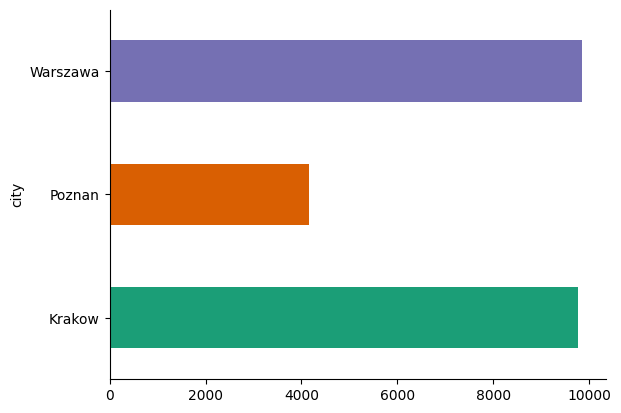

In [ ]:
# @title Zestawienie miast

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Zmiana typów zmiennych:

In [ ]:
data.loc[:, 'floor'] = data['floor'].astype(int)
data.loc[:, 'id'] = data['id'].astype(int)
data.loc[:, 'price'] = data['price'].astype(int)
data.loc[:, 'rooms'] = data['rooms'].astype(int)
data.loc[:, 'year'] = data['year'].astype(int)

<h3>Histogram dla zmiennej wyjściowej - price</h3>



<Axes: xlabel='price', ylabel='Count'>

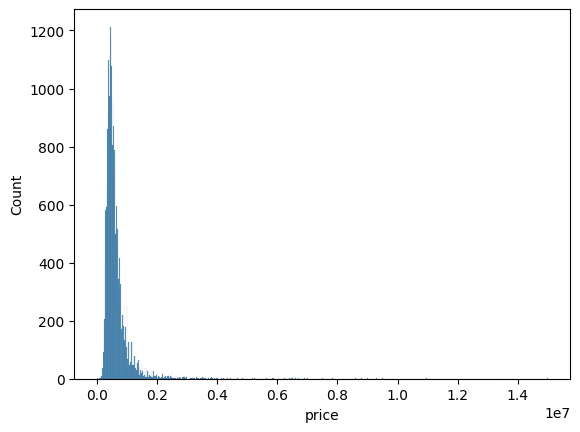

In [20]:
sns.histplot(data['price'])

<h3>Wykres ramka-wąsy dla zmiennej wyjściowej - price</h3>

<Axes: ylabel='price'>

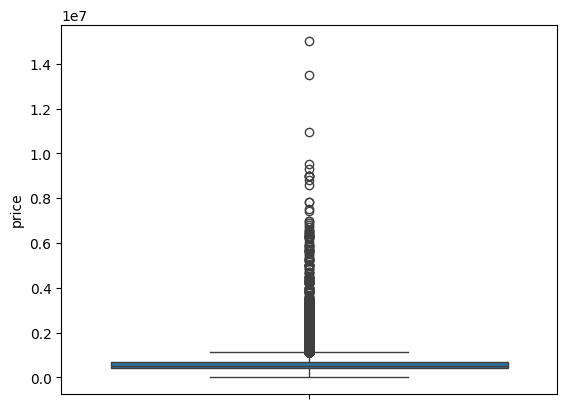

In [21]:
sns.boxplot(y=data['price'])

<h3>Określenie rozwiązywanego problemu(regresja, klasyfikacja, segmentacja)</h3>

x

<h3>Sposób podziału na zbiór uczący oraz zbiór testujący.</h3>


x

<h2>3. Opis zastosowanych sieci neuronowych. </h2>

Typ i architektura sieci, ilość epok uczenia, sposób uczenia sieci. Informacja o własnej implementacji/ użytym frameworku. Co najmniej 5 różnych architektur sieci.

<h2>4. Dyskusja wyników oraz wnioski.  </h2>

Zebrane w tabeli wyniki sieci z podziałem na zbiór uczący i testujący. Co najmniej 2 miary, wraz z komentarzem, dlaczego zostały wybrane takie, a nie inne. Określenie (subiektywne), czy wyniki są satysfakcjonujące wraz z uzasadnieniem. Wnioski, dalsze propozycje rozwoju projektu.

